# Comparison with Christina

The following is a comparison of algorithms for the DMA.

In [102]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# The following are the modules developed in testing here
from atmPy import atmosphere as atmos
import atmPy.instruments.DMA.dma  as dma

## Calibrating the NanoDMA

In the following experiments, Christina used the NOAA Wide DMA to calibrate the nano DMA.  In this instance, she passed a polydisperse population of particles through the NOAA Wide, at a fixed voltage.  She stepped the nano-DMA voltage and collected data.  According to her notes, the data of interest for 60 nm particles is collected on July 29 from 16:32 to 16:59.

In [103]:
# This is the location of the nano-DMA data
f = 'c:/Users/mrichardson/Documents/CompWChristina/2x/20150729_15_40_11.txt'

# Read in the data and set the index to the Date_Time column
nanoData = pd.read_csv(f, index_col=0)

# Restrict the data to the times of interest
df_30 = nanoData.loc['07/29/15 16:32:00':'07/29/15 16:59:00']

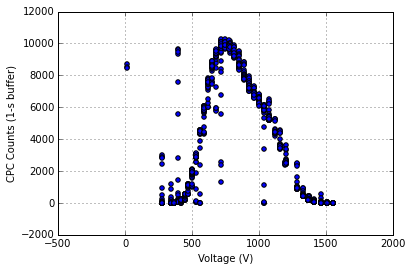

In [104]:
ax = df_30.plot(x='DMA_Volts', y='CPC_1_Cnt', kind='scatter')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('CPC Counts (1-s buffer)')

In [105]:
# Locate the row with the max value for the CPC_1_Cnt - this should be where the particles are...
max_loc = df_30.loc[df_30['CPC_1_Cnt'].idxmax()]

In [106]:
# Check the calculations

# Create a new gas object using air and set the temperature to 25 degrees C and pressure to 827 mb
air = atmos.Air(25, 827)

# Set the temperature and pressure to those of the sheath value
air.t = max_loc.Sh_Temp_C
air.p = max_loc.Sh_Pres_PSI

# Instantiate a new nano-DMA object 
nano_dma = dma.Tsi3085()

# Calculate the expected diameter in nm based on the column conditions
calc_dmax = nano_dma.v2d(max_loc.DMA_Volts, air, max_loc.Sh_Q_VLPM,max_loc.Sh_Q_VLPM)
print('The calculated maximum diameter is',calc_dmax, 'nm while the system generated diameter is', max_loc.DMA_Diam, 'nm.')

The calculated maximum diameter is 40.6820501851 nm while the system generated diameter is 41.168356 nm.


So, these values are consistent across calculations.  Now, we will check the standard DMA data (that is the DMA with the NOAA Wide dimensions).

In [107]:
# This is the location of the nano-DMA data
f2 = 'c:/Users/mrichardson/Documents/CompWChristina/2x/usb/standardDMAdata/20150729_15_46_15.txt'

# Read in the data and set the index to the Date_Time column
stdData = pd.read_csv(f2, index_col=0)

df60_std = stdData.loc['07/29/15 16:26:00':'07/29/15 17:06:00']

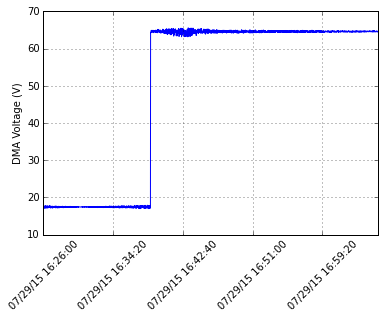

In [114]:
ax = df60_std.DMA_Volts.plot()
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
ax.set_xlabel('')
ax.set_ylabel('DMA Voltage (V)')

From this, it appears that the DMA voltage on the NOAA wide DMA was set to approximately 64 V to produce 60 nm particles.

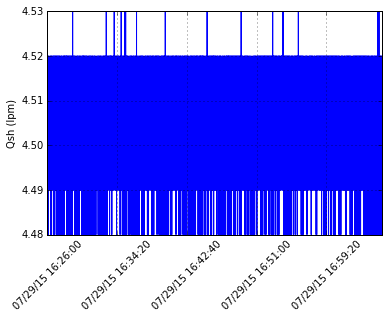

In [112]:
# Plot the sheath flow rate.
ax = df60_std.Sh_Q_VLPM.plot()
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
ax.set_xlabel('')
ax.set_ylabel('Qsh (lpm)')

Based on the plot above, the voltage for the NOAA wide DMA was set to approximately 64 V.  Now we can perform the calculation similar to the one above.

In [110]:
# Declare a new DMA object with the NOAA wide dimensions.
noaa_dma = dma.NoaaWide()

# Sheath flow was approximately 4.5 lpm
qsh = 4.5

# Voltage setpoint was approximately 64 V
v = 64

# Calculate the diameter based on these inputs
noaa_dma.v2d(v, air, qsh, qsh)

59.514889312811682

From this calculation, the NOAA wide DMA should have been producing 60 nm particles while the peak voltage of the nano-DMA indicated that these were 40 nm particles.